# Random raytracing examples

In [1]:
from pyoptools.all import *
from math import pi

## Creation of a simple one-lens system.

In [2]:
L1=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])
S=System(complist=[(L1,(0,0,100),(0,0,0))],n=1)
R=[Ray(pos=(0,0,0),dir=(0,.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,-.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(-.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,0,1),wavelength=.650)]
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(200,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

### Some geometrical parameters of the constructed lens.

In [3]:
L1.paraxial_constants() # Effective focal lenght, position of the anterior focal point, position of the posterior focal point

(98.43953923642411, -95.08584154340372, 95.08584154340372)

## Different examples of raytracing of a 2 lens system

In [4]:
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)) ],n=1)
R=[Ray(pos=(0,0,0),dir=(0,.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,-.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(-.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,0,1),wavelength=.650)]
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(200,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

In [5]:
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)) ],n=1)
R=[]

for x in range(-30,40,10):
    for y in range(-30,40,10):
        R.append(Ray(pos=(0,0,0),dir=(x,y,100),wavelength=.650))
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(200,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

In [6]:
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["N-BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)
R=[]

for x in range(-25,35,5):
    for y in range(-25,35,5):
        R.append(Ray(pos=(0,0,0),dir=(x,y,100),wavelength=.650))
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/richi/pyoptools_test/venv/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cross', 'unwrap', 'sqrt', 'Polygon', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


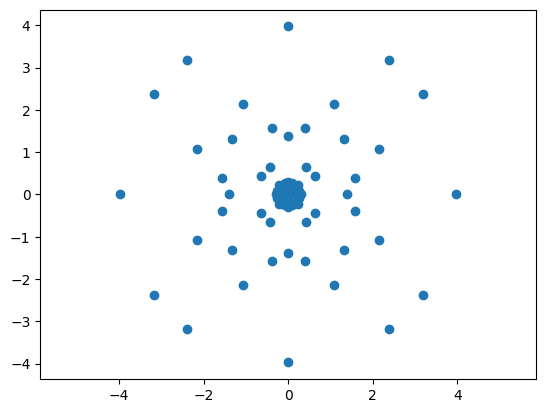

In [7]:
%pylab inline
spot_diagram(C)

## Prism spectroscope ray tracing

In [8]:
L=60
h=L/2.*cos(pi/3.)
h1=L/2*sin(pi/3)
S1=Plane(shape=Rectangular((L,L)))
S2=Plane(shape=Rectangular((L,L)))
S3=Plane(shape=Rectangular((L,L)))

T1=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
T2=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
P=Component(surflist=[(S1,(0,h1,0),(pi/2,0,0)),
                      (S2,(0,0,h),(pi/6,0,0)),
                      (S3,(0,0,-h),(-pi/6,0,0)), 
                      (T1,(L/2,0,0),(0,pi/2,0)),
                      (T2,(-L/2,0,0),(0,pi/2,0))
                      ], 
                      material=material.schott["BK7"])

L=SphericalLens(radius=25,curvature_s1=1./200.,curvature_s2=-1./200,thickness=10,material=material.schott["BK7"])
C=CCD()
PCCD=243.5
S=System(complist=[(P,(0,0,0),(0,0,0)),
                   (L,(0,.35*60,60),(-0.357,0,0)),
                   (C,(0,.35*PCCD,PCCD),(-0.357,0,0))],n=1)

R=[]

for x in range (-10,15,5):
    for y in range (-10,15,5):
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.45))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.5))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.55))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.60))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.65))
S.ray_add(R)
S.propagate()

Plot3D(S,center=(0,.35*60,60),size=(500,200),scale=2,rot=[(0,pi/2+.2,0),(-.1,0,0)])

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

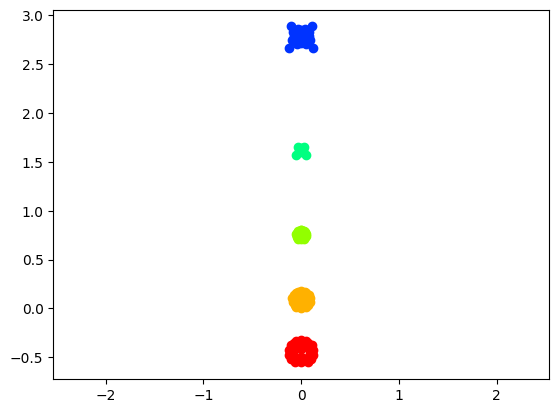

In [9]:
spot_diagram_c(C)

In [10]:
Plot3D(S,center=(0,.35*PCCD,PCCD),size=(50,30),scale=10,rot=[(0,pi/2+.1,0)])

Renderer(camera=OrthographicCamera(bottom=-150.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

## Another prism spectroscope 

In [11]:
L=60
h=L/2.*cos(pi/3.)
h1=L/2*sin(pi/3)
S1=Plane(shape=Rectangular((L,L)))
S2=Plane(shape=Rectangular((L,L)))
S3=Plane(shape=Rectangular((L,L)))

T1=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
T2=Plane(shape=Triangular(((2*h,h1),(-2*h,h1),(0,-h1))))
P=Component(surflist=[(S1,(0,h1,0),(pi/2,0,0)),
                      (S2,(0,0,h),(pi/6,0,0)),
                      (S3,(0,0,-h),(-pi/6,0,0)), 
                      (T1,(L/2,0,0),(0,pi/2,0)),
                      (T2,(-L/2,0,0),(0,pi/2,0))
                      ], 
                      material=material.schott["BK7"])

S4=Cylindrical(shape=Circular(radius=25),curvature=1./200)
S5=Cylindrical(shape=Circular(radius=25),curvature=-1./200)

L=Component(surflist=[(S5,(0,0,5),(0,0,pi/2)),
                      (S4,(0,0,-5),(0,0,pi/2))
                      ], 
                      material=material.schott["BK7"])


C=CCD()
PCCD=243.5
S=System(complist=[(P,(0,0,0),(0,0,0)),
                   (L,(0,.35*60,60),(-0.357,0,0)),
                   (C,(0,.35*PCCD,PCCD),(-0.357,0,0))],n=1)

R=[]

for x in range (-5,6,1):
    for y in range (-5,6,2):
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.45))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.5))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.55))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.60))
        R.append(Ray(pos=(x,y+35,-100),dir=(0,-.35,1),wavelength=.65))
S.ray_add(R)
S.propagate()

Plot3D(S,center=(0,.35*60,60),size=(500,200),scale=2,rot=[(0,pi/2+.2,0),(-.1,0,0)])

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



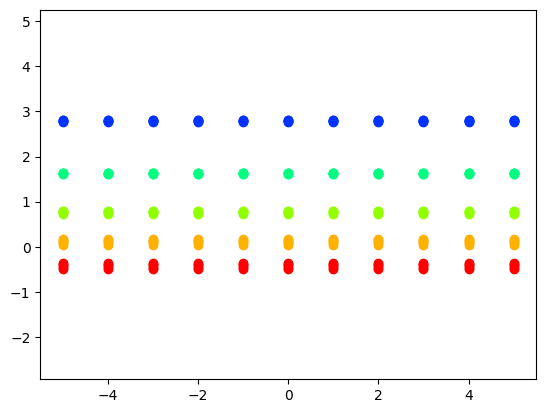

In [12]:
spot_diagram_c(C)

In [13]:
Plot3D(S,center=(0,.35*PCCD,PCCD),size=(50,30),scale=10,rot=[(0,pi/2+.1,0)])

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Placing diaphragms

In [14]:
L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

AP=Aperture(shape=Rectangular(size=(50,50)),ap_shape=Circular(radius=15))
#AP=Aperture(shape=Rectangular(size=(50,50)),ap_shape=Triangular(coord=((0,15),(15,-15),(-15,-15))))

APC=Component(surflist=[(AP,(0,0,0),(0,0,0))])

S=System(complist=[(L2,(0,0,100),(0,0,0)),
                   (L3,(0,0,120),(0,0,0)),
                   (C,(0,0,215),(0,0,0)),
                   (APC,(0,0,110),(0,0,0)),
                   ],n=1)
R=[]

for x in range(-25,35,2):
    for y in range(-25,35,2):
        R.append(Ray(pos=(0,0,0),dir=(x,y,100),wavelength=.650))
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/4,0)])

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

## Example with total internal reflection

In [15]:
P0=RightAnglePrism(width=50,height=50,material=material.schott["BK7"],reflectivity=0)
P1=RightAnglePrism(width=50,height=50,material=material.schott["BK7"],reflectivity=0)

S=System(complist=[(P0,(0,0,20),(0,0,pi/2)),(P1,(0,80,20),(0,0,-pi/2))],n=1)

R=[]
for x in range (-5,6,2):
    for y in range (-5,6,2):
        R.append(Ray(pos=(x,y,-100),dir=(0,0,1),wavelength=.45))
        
for x in range (-5,6,2):
    for z in range (35,45,2):
        R.append(Ray(pos=(x,100,z),dir=(0,-1,0),wavelength=.540))
        
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,40,-10),size=(200,150),scale=4,rot=[(0,-pi/2,0)])


Renderer(camera=OrthographicCamera(bottom=-300.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

## Multiple ray sources

Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

None

None

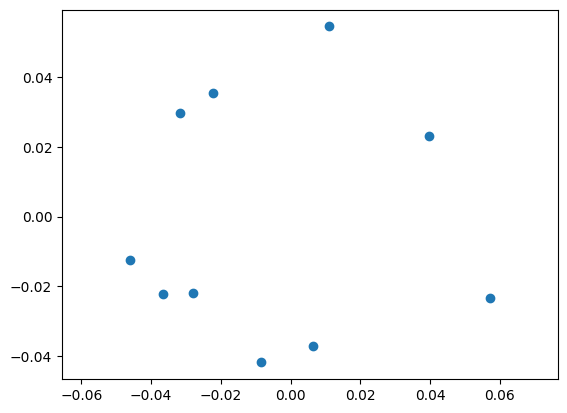

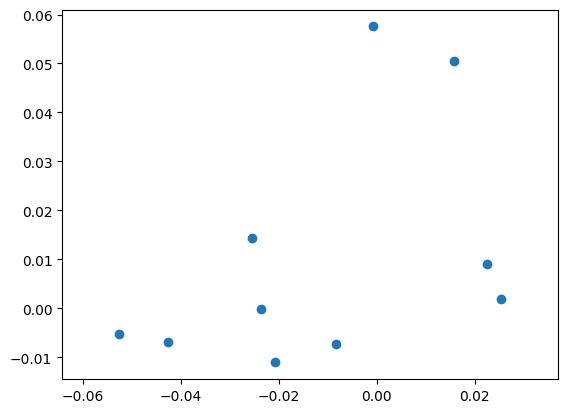

In [16]:
r_b=point_source_r(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/256
                   ,num_rays=10,wavelength=0.470, label="blue")

r_b1=point_source_r(origin=(30.,0.,0.),direction=(0.,0.,0),span=pi/256
                   ,num_rays=10,wavelength=0.470, label="blue1")


#r_b=point_source_p(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/256
#                   ,num_rays=(10,10),wavelength=0.470, label="blue")

#r_b1=point_source_p(origin=(30.,0.,0.),direction=(0.,0.,0),span=pi/256
#                   ,num_rays=(10,10),wavelength=0.470, label="blue1")

#r_b=point_source_c(origin=(0.,0.,0.),direction=(0.,0.,0),span=(pi/256,pi/256)
#                   ,num_rays=(10,10),wavelength=0.470, label="blue")

#r_b1=point_source_c(origin=(30.,0.,0.),direction=(0.,0.,0),span=(pi/256,pi/256)
#                   ,num_rays=(10,10),wavelength=0.470, label="blue1")



N_BK7=material.schott['BK7']
SF5=material.schott['SF5']
#Dobletes 32-327 Edmund Scientific
DB1=Doublet(radius=12.5,
    curvature_s1 =1./61.47,
    curvature_s2 =-1./44.64,
    curvature_s3 =-1./129.94,
    thickness_l1 = 6.,
    thickness_l2 = 2.5,
    material_l1  = N_BK7,
    material_l2  = SF5)


DB2=Doublet(radius=12.5,
    curvature_s1 =1./61.47,
    curvature_s2 =-1./44.64,
    curvature_s3 =-1./129.94,
    thickness_l1 = 6.,
    thickness_l2 = 2.5,
    material_l1  = N_BK7,
    material_l2  = SF5)


#Definition of a detector plane

ccd=CCD()
ccd1=CCD()

# Place de tetectors at the focal planes of the lenses

os=System(complist=[(DB1,(30,0,200),(0,0,0)),
                    (DB2,(0,0,200),(pi,0,0)),
                    (ccd,(30,0,float(400)),(0,0,0)),
                    (ccd1,(0,0,400),(0,0,0))
                    ],n=1)





#Add the ray sources

os.ray_add(r_b1)
os.ray_add(r_b)

os.propagate()

display(Plot3D(os,center=(0,0,200), size=(500,100),scale=2,rot=[(0,pi/2+.1,0),(-pi/4,0,0)]))

display(spot_diagram(ccd))
figure()
display(spot_diagram(ccd1))


## System made with a couple catalog doubletes

/home/richi/pyoptools_test/venv/lib/python3.11/site-packages/pyoptools/raytrace/library/library.py:157: DeprecationWarning: This method is deprecated, you can use dictionary-style accessinstead
  warnings.warn(
/home/richi/pyoptools_test/venv/lib/python3.11/site-packages/pyoptools/raytrace/library/library.py:157: DeprecationWarning: This method is deprecated, you can use dictionary-style accessinstead
  warnings.warn(
/home/richi/pyoptools_test/venv/lib/python3.11/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(MeshPhongMaterial).__init__(ambient='#050505').
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


Renderer(camera=OrthographicCamera(bottom=-120.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

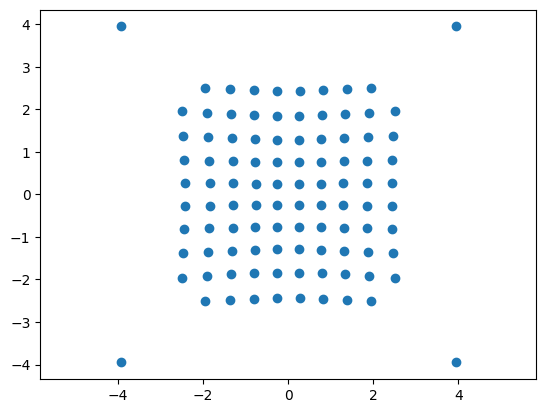

In [17]:
L1=library.Edmund.get("45408") ##f20,D5
L2=library.Edmund.get("45407")


ccd=CCD(size=(15,15))

spx=10.0*pi/180.
spy=10.0*pi/180.

R1=point_source_c(origin=(0, 0., -20), direction=(0., 0, 0), span=(spy, spx),num_rays=(10,10),wavelength=0.600 )


S=System(complist=[(L1, (0, 0, 0), (0, 0, 0)),
                (L2, (0, 0, 7), (0, 0, 0)),
                (ccd, (0, 0, 25), (0, 0, 0)),
                  
                   ], n=1)


S.ray_add(R1)
S.propagate()
spot_diagram(ccd)
Plot3D(S,center=(0,0,0), size=(80,30),scale=8,rot=[(0,-3*pi/8,0)])

## Aspheric lens

Renderer(camera=OrthographicCamera(bottom=-160.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

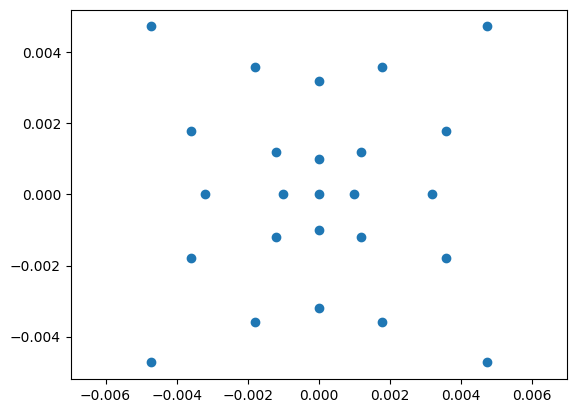

In [18]:
r_b= parallel_beam_c(size=(2,2),num_rays=(5,5), wavelength=.650)

R=2.75
k=-0.6139160
A2=0
A4=5.8891900E-04
A6=-1.7660200E-05
A8=1.0102500E-05
A10=-3.9148700E-06


r2=poly2d((0,0,0,1.,0,1.))
r4=r2*r2
r6=r4*r2
r8=r4*r4
r10=r8*r2

poly=A2*r2+A4*r4+ A6*r6 +A8*r8 +A10*r10

asf2=Aspherical(Kx=k, Ky=k, Ax=1./R,Ay=1./R, shape=Circular(radius=2.5),
                                poly=poly)




R=-3.1885400
k=-12.6638600

A2=0
A4=1.2458340e-02
A6=-3.7119450e-03
A8=5.1223910e-04
A10=-3.1085780e-05
poly=A2*r2+A4*r4+ A6*r6 +A8*r8 +A10*r10

asf1=Aspherical(Kx=k, Ky=k, Ax=1./R,Ay=1./R, shape=Circular(radius=2.5),
                                poly=poly, reflectivity=.5)



oc=Component(surflist=[(asf2, (0, 0, 0), (0, 0, 0)),
                                           (asf1, (0, 0, 2.8+.35), (0,0, 0))
                                           ],
                                                material=1.58913)

ccd=CCD(size=(3,3))



os=System(complist=[(oc,(0,0,20),(0,0,0)),
                                        (ccd,(0,0,20+2.8+2.14),(0,0,0)),
                                        ],n=1)



os.ray_add(r_b)
os.propagate()


display(Plot3D(os,center=(0,0,10), size=(50,20),scale=16,rot=[(0,-3*pi/8,0)]))

spot_diagram(ccd)


## Mis-aligned lenses

In [ ]:
N_BK7=material.schott["BK7"]
N_BAK4=material.hikari["BAK4"]
N_SF10=material.schott["SF10"]



# Definition of the ray sources at the origin

# Blue
#r_b= parallel_beam_c(size=(10,10),num_rays=(10,10), wavelength=.470)
r_b=point_source_r(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/512
                   ,num_rays=100,wavelength=0.470)

# Green
#r_g= parallel_beam_c(size=(10,10),num_rays=(10,10), wavelength=.540)
r_g=point_source_r(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/512
                   ,num_rays=100,wavelength=0.540)

# Red
#r_r= parallel_beam_c(size=(10,10),num_rays=(10,10), wavelength=.670)
r_r=point_source_r(origin=(0.,0.,0.),direction=(0.,0.,0),span=pi/512
                   ,num_rays=100,wavelength=0.670)

# Definition
oc=Doublet(radius=25,
    curvature_s1 =1./162.59,
    curvature_s2 =-1./123.82,
    curvature_s3 =-1./402.58,
    thickness_l1 = 9.75,
    thickness_l2 = 3.50,
    material_l1  = N_BAK4,
    material_l2  = N_SF10)

bs=BeamSplitingCube(size=50,material=N_BK7,reflectivity=0.5)

#Definition of a detector plane

ccd=CCD()


# Place the detectors at the focal planes of the lenses

os=System(complist=[(oc,(0,0,500),(.50,0,0)),
                    (ccd,(0,0,float(990)),(0,0,0)),
                    (bs,(0,0,float(750)),(0,0,0)),
                    ],n=1)

#Add the ray sources
os.ray_add(r_b)
os.ray_add(r_g)
os.ray_add(r_r)
os.propagate()

display(Plot3D(os,center=(0,0,500), size=(1200,200),scale=1,rot=[(0,pi/2,0),(.3,0,0)]))

spot_diagram_c(ccd)



## System with multiple beam splitters

In [ ]:
N_BK7=material.schott['BK7']

bs=BeamSplitingCube(size=8,material=N_BK7,reflectivity=0.5)

L1=library.Edmund.get("45408") ##f20,D5
L2=library.Edmund.get("31861")
ccd=CCD(size=(10,10), transparent=False)


spx=10.0*pi/180.
spy=10.0*pi/180.

R1=point_source_c(origin=(0, 0., -15), direction=(0., 0, 0), span=(spy, spx),num_rays=(10,10),wavelength=0.450 )


S=System(complist=[(L1, (0, 0, 0), (0, 0, 0)),
                   (bs, (0, 0, 15), (0, 0, 0)),
                   (L2, (-10, 0, 15), (0, 90*pi/180., 0)),
                   (bs, (-20, 0, 15), (90*pi/180., 0, 0))
                   
                   
                   ], n=1)


S.ray_add(R1)


S.propagate()
Plot3D(S,center=(-15,0,7), size=(50,50),scale=16,rot=[(0,-pi/2,0),(-pi/2+.1,-pi/4,0)])